In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./2019data.csv', delimiter=' ')

# df.head()
# print columns
print(df.columns)

Index(['No', 'Profile', 'Tanggal', 'Jam', 'O3', 'CO', 'NO2', 'SO2', 'NO',
       'CO2', 'VOC', 'PM1', 'PM2.5', 'PM4', 'PM10', 'TSP', 'TEMP', 'HUM', 'WS',
       'WD', 'ISPU', 'Status', 'Unnamed: 22'],
      dtype='object')


Epoch 1/500


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 59.4727 - val_loss: 6.5234
Epoch 2/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 4.9301 - val_loss: 4.6115
Epoch 3/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 3.0283 - val_loss: 4.4647
Epoch 4/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 2.5449 - val_loss: 4.5495
Epoch 5/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 2.3575 - val_loss: 4.0113
Epoch 6/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 2.1940 - val_loss: 4.0440
Epoch 7/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 1.9810 - val_loss: 3.9499
Epoch 8/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 1.8272 - val_loss: 2.9892
Epoch 9/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 2.6490 - val_loss: 2.8888
Epoch 10/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 1.9634 - val_loss: 2.9534
Epoch 11/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 1.6348 - val_loss: 4.0271
Epoch 12/500
231/231 ━━━━━━━━━

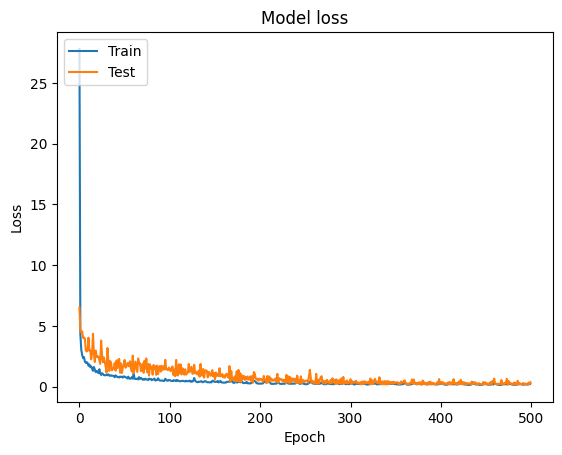

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./2019data.csv', delimiter=' ')

# Selecting features and target
features_columns = ['O3', 'CO', 'NO2', 'SO2', 'NO', 'CO2', 'VOC', 'PM1', 'PM2.5', 'PM4', 'PM10', 'TSP']
features = df[features_columns].values
target = df['ISPU'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for CNN input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=500, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
Mean Squared Error: 0.3671650912535442
Mean Absolute Error: 0.3233337322311525


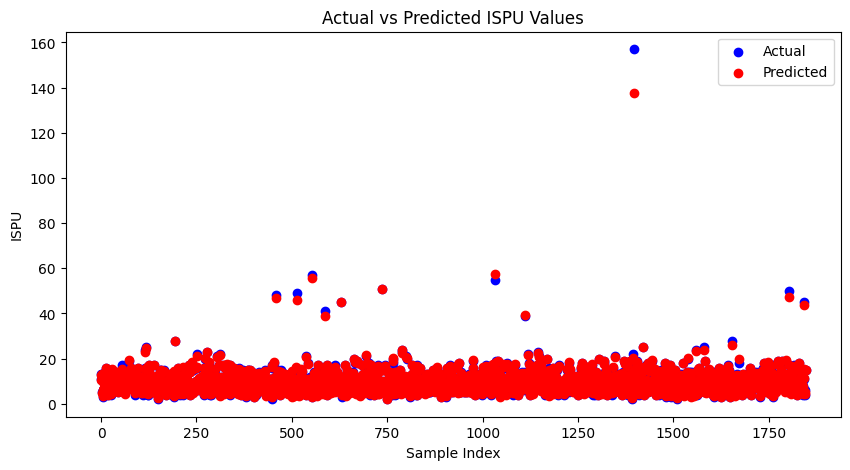

In [6]:
# Make predictions on the test set
test_predictions = model.predict(X_test_reshaped)

# Optionally, you can inverse transform the predictions and actual values if you have performed scaling
# test_predictions = scaler.inverse_transform(test_predictions)
# y_test_inversed = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# To see how the predicted values compare to the actual values, plot them together
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(test_predictions)), test_predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted ISPU Values')
plt.xlabel('Sample Index')
plt.ylabel('ISPU')
plt.legend()
plt.show()


Epoch 1/500


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


231/231 - 0s - 2ms/step - loss: 22.5028 - val_loss: 6.3942
Epoch 2/500
231/231 - 0s - 639us/step - loss: 4.3878 - val_loss: 6.3377
Epoch 3/500
231/231 - 0s - 758us/step - loss: 3.3390 - val_loss: 6.6104
Epoch 4/500
231/231 - 0s - 616us/step - loss: 2.9323 - val_loss: 6.2567
Epoch 5/500
231/231 - 0s - 615us/step - loss: 2.9258 - val_loss: 4.4627
Epoch 6/500
231/231 - 0s - 612us/step - loss: 2.8992 - val_loss: 5.8003
Epoch 7/500
231/231 - 0s - 605us/step - loss: 2.5925 - val_loss: 5.0331
Epoch 8/500
231/231 - 0s - 605us/step - loss: 2.4162 - val_loss: 5.4648
Epoch 9/500
231/231 - 0s - 707us/step - loss: 2.4907 - val_loss: 5.1873
Epoch 10/500
231/231 - 0s - 625us/step - loss: 2.3908 - val_loss: 4.7740
Epoch 11/500
231/231 - 0s - 605us/step - loss: 2.3671 - val_loss: 3.9735
Epoch 12/500
231/231 - 0s - 616us/step - loss: 2.0800 - val_loss: 3.5171
Epoch 13/500
231/231 - 0s - 624us/step - loss: 2.0053 - val_loss: 3.3864
Epoch 14/500
231/231 - 0s - 688us/step - loss: 1.8848 - val_loss: 3.8456


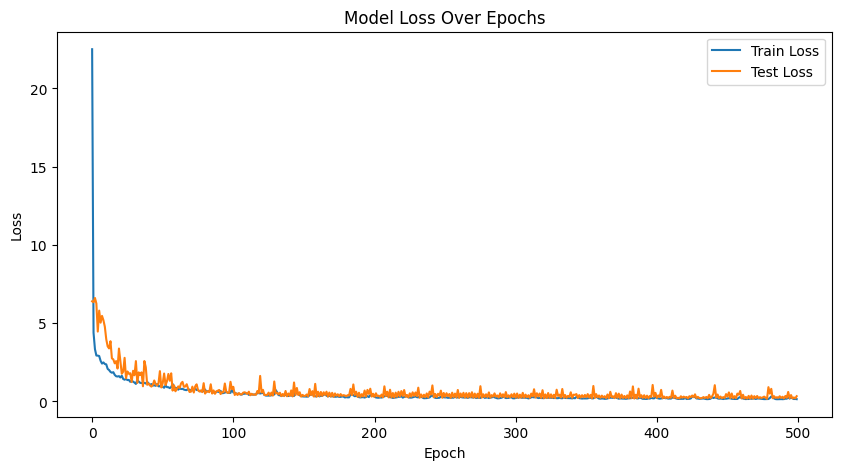

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
Train Score: 0.37 RMSE
Test Score: 0.58 RMSE


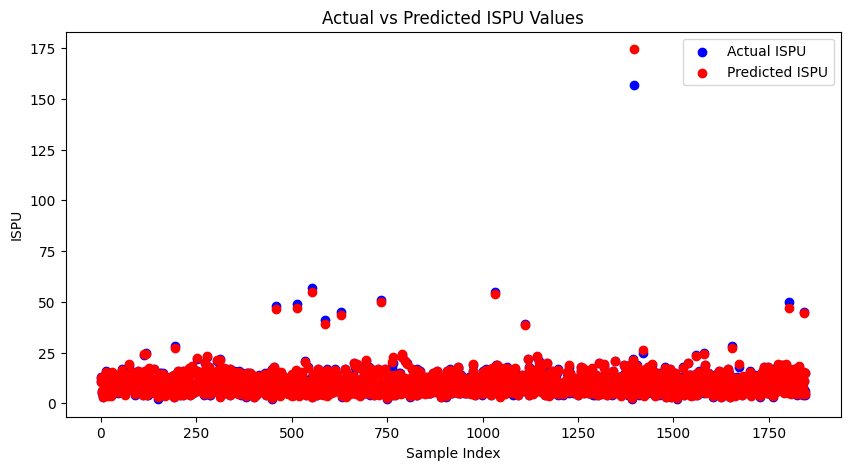

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Sample index: 10, Actual Value: 14, Predicted Value: 13.423981666564941
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Sample index: 50, Actual Value: 7, Predicted Value: 7.176965713500977
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Sample index: 100, Actual Value: 9, Predicted Value: 9.503642082214355


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# Load the dataset
df = pd.read_csv('./2019data.csv', delimiter=' ')

# Selecting features and target
features_columns = ['O3', 'CO', 'NO2', 'SO2', 'NO', 'CO2', 'VOC', 'PM1', 'PM2.5', 'PM4', 'PM10', 'TSP']
features = df[features_columns].values
target = df['ISPU'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for CNN input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=500, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=2)

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
test_predictions = model.predict(X_test_reshaped)

# Calculate RMSE for train and test sets
trainScore = math.sqrt(mean_squared_error(y_train, model.predict(X_train_reshaped)))
testScore = math.sqrt(mean_squared_error(y_test, test_predictions))

print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')

# To see how the predicted values compare to the actual values, plot them together
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual ISPU')
plt.scatter(range(len(test_predictions)), test_predictions, color='red', label='Predicted ISPU')
plt.title('Actual vs Predicted ISPU Values')
plt.xlabel('Sample Index')
plt.ylabel('ISPU')
plt.legend()
plt.show()

# Make some individual predictions
sample_indices = [10, 50, 100]  # Just an example, choose indices appropriate for your dataset
for index in sample_indices:
    sample_feature = X_test_reshaped[index]
    true_value = y_test[index]
    predicted_value = model.predict(np.expand_dims(sample_feature, axis=0))
    print(f'Sample index: {index}, Actual Value: {true_value}, Predicted Value: {predicted_value[0][0]}')


Epoch 1/500


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 50.4745 - val_loss: 7.2369
Epoch 2/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 5.5971 - val_loss: 4.8833
Epoch 3/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 4.0630 - val_loss: 5.1559
Epoch 4/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 2.8897 - val_loss: 5.9545
Epoch 5/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 2.8998 - val_loss: 4.8276
Epoch 6/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 2.6191 - val_loss: 4.7628
Epoch 7/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 2.6945 - val_loss: 5.2262
Epoch 8/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 2.1272 - val_loss: 4.2732
Epoch 9/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 2.8515 - val_loss: 3.1885
Epoch 10/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 2.0505 - val_loss: 3.7939
Epoch 11/500
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 2.0912 - val_loss: 2.8860
Epoch 12/500
231/231 ━━━━━━━━━

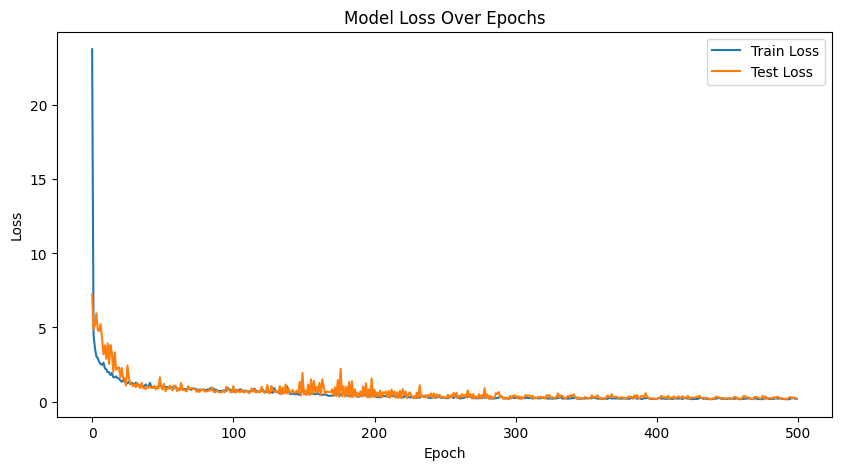

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
Train Score: 0.45 RMSE
Test Score: 0.46 RMSE


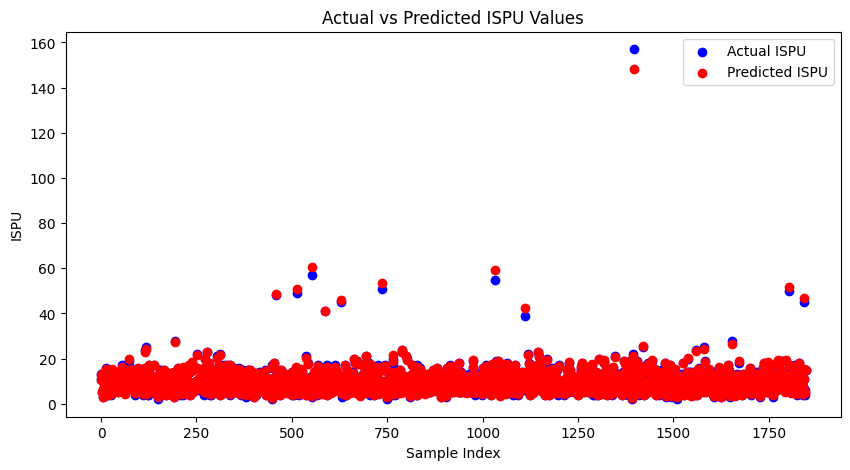

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# Load the dataset
df = pd.read_csv('./2019data.csv', delimiter=' ')

# Selecting features and target
features_columns = ['O3', 'CO', 'NO2', 'SO2', 'NO', 'CO2', 'VOC', 'PM1', 'PM2.5', 'PM4', 'PM10', 'TSP']
features = df[features_columns].values
target = df['ISPU'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for CNN input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=500, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
test_predictions = model.predict(X_test_reshaped)

# Calculate RMSE for train and test sets
trainScore = math.sqrt(mean_squared_error(y_train, model.predict(X_train_reshaped)))
testScore = math.sqrt(mean_squared_error(y_test, test_predictions))

print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')

# To see how the predicted values compare to the actual values, plot them together
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual ISPU')
plt.scatter(range(len(test_predictions)), test_predictions, color='red', label='Predicted ISPU')
plt.title('Actual vs Predicted ISPU Values')
plt.xlabel('Sample Index')
plt.ylabel('ISPU')
plt.legend()
plt.show()


Epoch 1/500


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


231/231 - 1s - 5ms/step - loss: 42.8250 - val_loss: 34.3605
Epoch 2/500
231/231 - 0s - 2ms/step - loss: 27.4315 - val_loss: 33.3898
Epoch 3/500
231/231 - 0s - 2ms/step - loss: 24.2644 - val_loss: 26.6800
Epoch 4/500
231/231 - 0s - 2ms/step - loss: 17.8822 - val_loss: 23.8967
Epoch 5/500
231/231 - 0s - 2ms/step - loss: 14.4368 - val_loss: 20.5172
Epoch 6/500
231/231 - 0s - 2ms/step - loss: 12.3843 - val_loss: 18.5056
Epoch 7/500
231/231 - 0s - 2ms/step - loss: 10.6970 - val_loss: 16.3998
Epoch 8/500
231/231 - 0s - 2ms/step - loss: 9.3747 - val_loss: 15.0570
Epoch 9/500
231/231 - 0s - 2ms/step - loss: 8.3629 - val_loss: 13.8845
Epoch 10/500
231/231 - 0s - 2ms/step - loss: 7.4811 - val_loss: 13.3803
Epoch 11/500
231/231 - 0s - 2ms/step - loss: 6.6047 - val_loss: 11.9874
Epoch 12/500
231/231 - 0s - 2ms/step - loss: 5.8633 - val_loss: 11.0146
Epoch 13/500
231/231 - 0s - 2ms/step - loss: 5.2117 - val_loss: 10.4176
Epoch 14/500
231/231 - 0s - 2ms/step - loss: 4.7044 - val_loss: 9.9007
Epoch 1

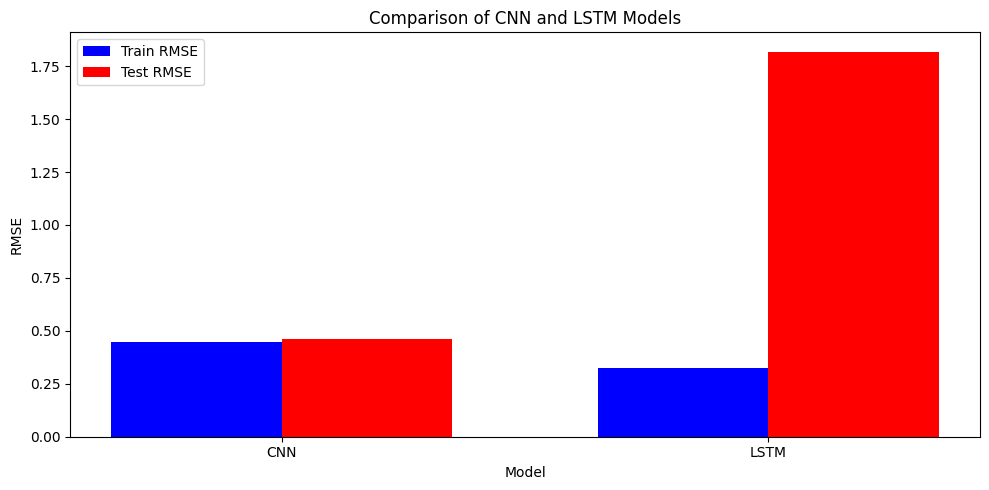

In [11]:
from tensorflow.keras.layers import LSTM

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_history = lstm_model.fit(X_train_reshaped, y_train, epochs=500, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=2)

# Evaluate the LSTM model
lstm_trainScore = math.sqrt(mean_squared_error(y_train, lstm_model.predict(X_train_reshaped)))
lstm_testScore = math.sqrt(mean_squared_error(y_test, lstm_model.predict(X_test_reshaped)))

print(f'LSTM Train Score: {lstm_trainScore:.2f} RMSE')
print(f'LSTM Test Score: {lstm_testScore:.2f} RMSE')

# Compare CNN and LSTM
print("Comparison of Models:")
print(f"{'Model':<10} {'Train RMSE':<15} {'Test RMSE':<15}")
print(f"{'CNN':<10} {trainScore:<15.2f} {testScore:<15.2f}")
print(f"{'LSTM':<10} {lstm_trainScore:<15.2f} {lstm_testScore:<15.2f}")

# Plot the comparison as a bar chart for visual analysis
plt.figure(figsize=(10, 5))
bar_width = 0.35
index = np.arange(2)
train_scores = [trainScore, lstm_trainScore]
test_scores = [testScore, lstm_testScore]

bar1 = plt.bar(index, train_scores, bar_width, label='Train RMSE', color='b')
bar2 = plt.bar(index + bar_width, test_scores, bar_width, label='Test RMSE', color='r')

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of CNN and LSTM Models')
plt.xticks(index + bar_width / 2, ('CNN', 'LSTM'))
plt.legend()
plt.tight_layout()
plt.show()


The LSTM architecture might not be suitable for the data's complexity.
Solution: Experimenting with different architectures, such as stacking multiple LSTM layers or combining CNNs and LSTMs, might yield better results.


In [13]:
from tensorflow.keras.layers import Input

# Assuming X_train_reshaped and X_test_reshaped have been properly scaled
# The input shape should be in the form of [samples, time_steps, features]

# Start with a clear model definition
tf.keras.backend.clear_session()

# Define the CNN-LSTM model
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Input(shape=(X_train_reshaped.shape[1], 1)))  # Replace with actual input shape
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(50, activation='relu'))
cnn_lstm_model.add(Dense(1))

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_lstm_history = cnn_lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),
    verbose=2
)

# Evaluate the model
cnn_lstm_trainScore = math.sqrt(mean_squared_error(y_train, cnn_lstm_model.predict(X_train_reshaped)))
cnn_lstm_testScore = math.sqrt(mean_squared_error(y_test, cnn_lstm_model.predict(X_test_reshaped)))

print(f'CNN-LSTM Train Score: {cnn_lstm_trainScore:.2f} RMSE')
print(f'CNN-LSTM Test Score: {cnn_lstm_testScore:.2f} RMSE')


Epoch 1/100
231/231 - 1s - 4ms/step - loss: 36.4875 - val_loss: 15.8189
Epoch 2/100
231/231 - 0s - 2ms/step - loss: 8.0610 - val_loss: 9.5169
Epoch 3/100
231/231 - 0s - 1ms/step - loss: 5.5213 - val_loss: 5.4517
Epoch 4/100
231/231 - 0s - 1ms/step - loss: 4.8254 - val_loss: 9.5770
Epoch 5/100
231/231 - 0s - 2ms/step - loss: 5.0795 - val_loss: 12.7917
Epoch 6/100
231/231 - 0s - 1ms/step - loss: 3.9283 - val_loss: 5.5224
Epoch 7/100
231/231 - 0s - 1ms/step - loss: 3.6684 - val_loss: 3.6256
Epoch 8/100
231/231 - 0s - 1ms/step - loss: 3.0707 - val_loss: 3.7013
Epoch 9/100
231/231 - 0s - 2ms/step - loss: 2.8735 - val_loss: 3.4007
Epoch 10/100
231/231 - 0s - 2ms/step - loss: 2.7719 - val_loss: 3.4012
Epoch 11/100
231/231 - 0s - 2ms/step - loss: 2.7675 - val_loss: 3.3662
Epoch 12/100
231/231 - 0s - 2ms/step - loss: 2.7039 - val_loss: 3.2380
Epoch 13/100
231/231 - 0s - 1ms/step - loss: 2.6300 - val_loss: 4.1260
Epoch 14/100
231/231 - 0s - 1ms/step - loss: 2.6471 - val_loss: 3.3608
Epoch 15/100

In [14]:
from tensorflow.keras.layers import Dropout

# Define the CNN-LSTM model with Dropout
model = Sequential()
model.add(Input(shape=(X_train_reshaped.shape[1], 1)))  # Replace with actual input shape
model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping and a validation split
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # Add a validation split
    callbacks=[early_stopping],
    verbose=2
)

# Evaluate the model
trainScore = math.sqrt(mean_squared_error(y_train, model.predict(X_train_reshaped)))
testScore = math.sqrt(mean_squared_error(y_test, model.predict(X_test_reshaped)))

print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')


Epoch 1/100
185/185 - 1s - 6ms/step - loss: 44.3651 - val_loss: 13.6915
Epoch 2/100
185/185 - 0s - 2ms/step - loss: 17.3291 - val_loss: 8.8114
Epoch 3/100
185/185 - 0s - 2ms/step - loss: 16.3456 - val_loss: 9.2233
Epoch 4/100
185/185 - 0s - 2ms/step - loss: 15.5603 - val_loss: 7.8031
Epoch 5/100
185/185 - 0s - 2ms/step - loss: 13.2945 - val_loss: 7.7174
Epoch 6/100
185/185 - 0s - 2ms/step - loss: 13.3233 - val_loss: 8.1370
Epoch 7/100
185/185 - 0s - 2ms/step - loss: 14.5235 - val_loss: 7.6512
Epoch 8/100
185/185 - 0s - 2ms/step - loss: 13.3655 - val_loss: 6.9947
Epoch 9/100
185/185 - 0s - 2ms/step - loss: 12.4390 - val_loss: 6.5312
Epoch 10/100
185/185 - 0s - 2ms/step - loss: 16.1075 - val_loss: 7.1855
Epoch 11/100
185/185 - 0s - 2ms/step - loss: 13.3836 - val_loss: 6.0163
Epoch 12/100
185/185 - 0s - 2ms/step - loss: 11.8312 - val_loss: 6.2909
Epoch 13/100
185/185 - 0s - 2ms/step - loss: 12.3526 - val_loss: 7.0943
Epoch 14/100
185/185 - 0s - 2ms/step - loss: 9.5436 - val_loss: 6.5957
E